# Trabalho #1 - Biblioteca de dados, RNAs pré-treinadas e PipeLine de dados

Nesse trabalho você vai criar e treinar uma RNA, usando como base uma rede pré-treinada, para resolver um problema de classificação multiclasse.

Para fazer isso você vai criar um pipeline de dados para treinamento, usar os vetores de características da RNA EfficientNet e um conjunto de dados de imagens de satélite para treinar uma nova RNA para classificar tipos de áreas a partir de imagens de satélites.


## Coloque o seu nome aqui:

Nome: Wallace de Castro Galvão

Nome:

Nome:

## 1. Importar bibliotecas

Primeiramente devemos instalar o tf_keras, que é uma versão compatível do Keras com o TensorFlow 2.17 para permitir usar alguns modelos do TensorFlow Hub.

Execute as células abaixo para importar as bilbiotecas necessárias.

In [1]:
!pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 64.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1

[notice] A new release of pip is available: 24.2 ->

In [1]:
import tensorflow as tf
import tf_keras as keras
print("Using TensorFlow Version:", tf.__version__)
print("Using Keras Version:", keras.__version__)

import tensorflow_datasets as tfds
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

2024-11-06 18:03:40.932286: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 18:03:40.935100: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-06 18:03:40.943593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730916220.957435   14060 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730916220.961593   14060 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 18:03:40.977774: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Using TensorFlow Version: 2.18.0
Using Keras Version: 2.18.0


## 2. Carregar dados do TensorFlow Data Service (TFDS)

O conjunto de dados EuroSAT é baseado nas imagens do satélite Sentinel-2 e consiste de 27.000 imagens coloridas de dimensão 64x64x3 com 10 classes.  

Dois conjuntos de dados são disponibilizados: (1) eurosat/rgb que contém imagens no formato RGB, que é o que usaremos; e (2) eurosat/all com imagens de 13 canais diferentes.


### Exercício #1: Carregar dados

A primeira etapa é carregar as imagens. Esse conjunto de dados está disponível no TFDS com o nome `eurosat/rgb`. Os dados estão em um único conjunto de nome "train" e, portanto precisam ser divididos em pelo menos dois conjuntos: dados de treinamento e de validação.

Na célula abaixo inclua o seu código para carregar esse conjunto de dados. Mais detalhes de como carregar esse dados podem ser vistos em https://www.tensorflow.org/datasets.

Ao carregar os dados, use o argumento `split` com porcentagens para separar os dados em dois conjuntos: dados de treinamento (80% dos dados) e de validação (20% dos dados). Para obter maiores detalhes de como usar o  método `tfds.load` pode ser obtido em https://www.tensorflow.org/datasets/splits.

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Carrega dados do TFDS
# Inclua seu código aqui (2 linhas)
train_data, info = tfds.load('eurosat/rgb', shuffle_files=True, as_supervised=True, with_info=True, split="train[:80%]")
val_data = tfds.load('eurosat/rgb', as_supervised=True, split="train[80%:]")

Execute a célula abaixo para visualizar as informações sobre esse o conjunto de dados `eurosat/rgb`.

In [5]:
info

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir='/home/codespace/tensorflow_datasets/eurosat/rgb/2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    

Verifique o número de exemplos de treinamento e de validação executando a célula abaixo.

In [6]:
print('Número exemplos de treinamento =', len(list(train_data)))
print('Número exemplos de treinamento =', len(list(val_data)))

2024-11-06 18:07:04.817858: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-11-06 18:07:07.958370: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Número exemplos de treinamento = 21600
Número exemplos de treinamento = 5400


2024-11-06 18:07:08.861961: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


**Saída esperada:**

    Número exemplos de treinamento = 21600
    Número exemplos de treinamento = 5400

Execute a célula abaixo para definir a lista com os nomes das classes existentes no conjutno de dados.

In [7]:
labels_list = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial',
               'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
print(labels_list)

['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


### Exercício #2: Visualização dos dados

Na célula abaixo escreva um código para obter 5 exemplos dos dados de treinamento e visualizá-los juntamento com os nomes (`labels_list`) e números das classes.

Para fazer isso você vai precisar de um laço `for`, dos comandos `print`, `plt.imshow()`, `plt.show()`, e do método `take()`.

Classe: Forest - 1


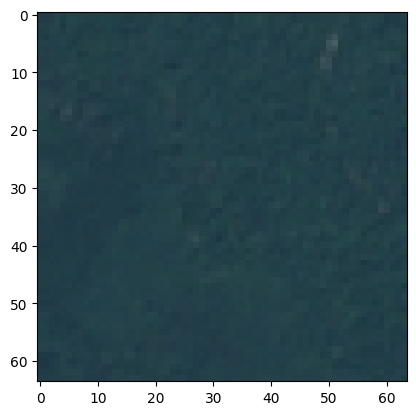

Classe: Residential - 7


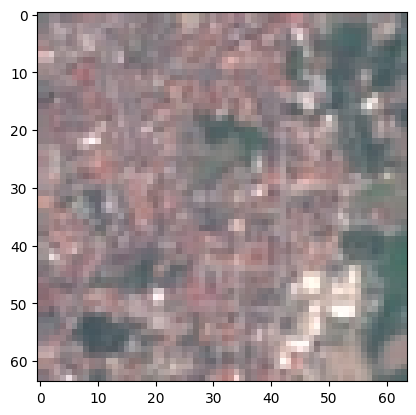

Classe: HerbaceousVegetation - 2


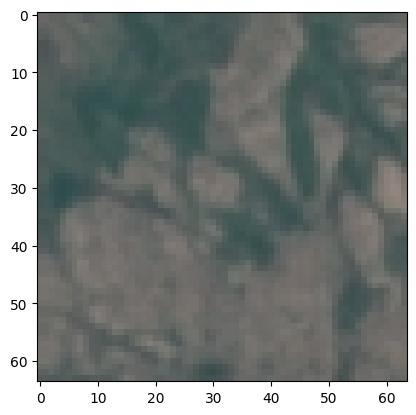

In [8]:
# Itera no conjunto de dados pegando exemplos
# Inclua seu código aqui (~5 linhas)
for data in train_data.take(3):
    image, label = data
    print("Classe:", labels_list[label], '-', format(label))
    plt.imshow(image)
    plt.show()

**Exemplo de saída esperada (sem as figuras):**

    Classe: Forest - 1
    Classe: Residential - 7
    Classe: River - 8
    


## 3. Processamento dos dados

Após carregar os dados, você tem que processá-los para poderem ser usados pela RNA.

O módulo de vetores de características da EfficientNet permite que as imagens tenham em princípio qualquer dimensão, assim, não é necessário redimensionar as imagens. Porém, os valores dos pixels devem estar entre 0 e 1, conforme mencionado nas instruções de uso desse módulo, que podem ser vistas em https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1.

### Exercício #3: Normalização das imagens

Na célula abaixo escreva um código para normalizar um lote de imagens e depois crie os lotes de dados de treinamento e de validação.

Conforme vimos na aula, ao importar os dados do TF Data Services, os dados são armazenados em objetos e para podermos usar esses dados de forma eficiente temos que usar os métodos fornecidos para esse tipo de objeto.

Para normalizar as imagens crie uma função de nome `format_image` e a utilize chamando o método `map()`. Para normalizar os dados você vai precisar primeiramente transformá-los em `float32`, para isso use a função `tf.cast()`. As instruções de uso dessa função podem ser vistas em https://www.tensorflow.org/api_docs/python/tf/cast.

Crie um dataset eficiente, para isso utilize processamento em paralelo quando executar a função de pré-processamento dos dados. Use tamném os métodos `cache` e `prefetch`.

In [9]:
# Definição da dimensão das imagens para processamento e do tamanho dos lotes de dados

# Use otimização do pipeline
AUTOTUNE = tf.data.AUTOTUNE

# Inclua seu código aqui (~2 linhas)
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 32

# Função usada para redimensionar e normalizar as imagens
# Inclua seu código aqui (~3 linhas)
def format_image(image, label):
    image = tf.cast(image, dtype=tf.float32) / 255.0
    return  image, label

# Cria lotes de dados usando o método map() para chamar a função format_image()
# Inclua seu código aqui (~2 linhas)
train_batches = train_data.map(format_image, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
val_batches = val_data.map(format_image, num_parallel_calls=AUTOTUNE).cache().batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

train_batches

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

**Saída espeada:**

    <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>  

Execute a célula abixo para verificar se o seu dataset está correto.

In [10]:
for img, label in train_batches.take(1):
    print('Dimensão de um lote de imagens:', img.shape)
    print('Dimensão de um lote de saídas desejadas:', label.shape)

Dimensão de um lote de imagens: (32, 64, 64, 3)
Dimensão de um lote de saídas desejadas: (32,)


2024-11-06 18:12:59.752215: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-06 18:12:59.752958: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


**Saída esperada:**

    Dimensão de um lote de imagens: (32, 64, 64, 3)
    Dimensão de um lote de saídas desejadas: (32,)

## 4.  Criação da RNA

Nesse trabalho você vai criar e treinar uma RNA para identificar tipos de áreas a partir de imagens do satélite Sentinel-2.

Para isso você vai criar uma RNA usando como base o módulo de vetor de características da rede EfficientNet, que foi treinada com as imagens da ImageNet.

As redes EfficientNets são utilizadas para classificar imagens e apresentam um desempenho similar a outras redes mais conhecidas, porém, possui um número muito menor de parâmetros e é muito mais rápida. O trabalho que originou essa RNA é
Mingxing Tan and Quoc V. Le: EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks, ICML 2019.

### Exercício #4: Carregar vetor de características do TF-Hub

Na célula abaixo crie um código que importa o módulo de vetores de características da EfficientNet e o coloca no objeto `feature_extractor`. Essa rede estão no TF-Hub e as informações de como usá-la podem ser obtidas no link https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1.

Pra fazer isso você vai precisar definir a dimensão do tensor de entrada da rede usando o argumento `input_shape` e a função `hub.KerasLayer()`.

In [11]:
# Dimensão das imagens para argumento input_shape
# Inclua seu código aqui (~1 linha)
IMAGE_DIM = (64, 64, 3)

# Carrega vetores de características com a URL do módulo
# Inclua seu código aqui (~2 linhas)
MODULE_HANDLE ="https://tfhub.dev/google/efficientnet/b0/feature-vector/1"
feature_extractor = hub.KerasLayer(MODULE_HANDLE, input_shape=IMAGE_DIM)
feature_extractor

**Saída esperada:**

    <tensorflow_hub.keras_layer.KerasLayer at 0x7ff58df7ae48>

In [12]:
for img, label in train_batches.take(2):
    feat = feature_extractor(img)
    print(feat.shape)

(32, 1280)
(32, 1280)


2024-11-06 18:15:27.345710: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


**Saída esperada:**

    (32, 1280)
    (32, 1280)

### Exercício #5: Criação da RNA como o Keras

Na célula abaixo crie um código que incorpora o `feature_extractor`, criado no exercício #4, em uma rede sequencial do Keras para realizar a tarefa de classificação multiclasse com 10 classes.

Após criar a RNA utilize o método `summary()` para apresentá-la.

In [13]:
# Número de classes da RNA
# Inclua seu código aqui (~1 linha)
NUM_CLASSES = 10

# Cria modelo seguencial do Keras para problema de classificação com 10 classes
# Inclua seu código aqui (~3 linhas)
rna = keras.Sequential([
       keras.layers.InputLayer(input_shape=IMAGE_DIM),
       feature_extractor,
       keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Apresenta configuração da RNA
# Inclua seu código aqui (~1 linha)
rna.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


**Saída esperada:**

    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    keras_layer (KerasLayer)     (None, 1280)              4049564   
    _________________________________________________________________
    dense (Dense)                (None, 10)                12810     
    =================================================================
    Total params: 4,062,374
    Trainable params: 12,810
    Non-trainable params: 4,049,564
    _________________________________________________________________

## 5. Compilação e treinamento da RNA

Como visto em aula, o treinamento da RNA deve ser realizado de forma que somente os parâmetros da camada densa, adicionada ao extrator de características, sejam alterados durante o treinamento. Isso é necessário para não destrui a parte da RNA que corresponde à EfficientNet, que já foi previamente treinada com um conjunto de centenas de milhares de imagens. Assim, você tem que "congelar" os parâmetros do extrator e características.

### Exercício #6: Compilação da RNA

Na célula abaixo crie um código que congela os parâmetros do `feature_extractor` e compila a RNA usando os seguintes parâmetros:

- Método de otimização: Adam;
- Fução de custo: `sparse_categorical_crossentropy`;
- Métrica: `accuracy`.

In [14]:
# Congela parâmetros da MobiliNet
# Inclua seu código aqui (~1 linha)
feature_extractor.trainable = False

# Define método de otimização
# Inclua seu código aqui (~1 linha)
optimizer = 'adam'

# Compila RNA
# Inclua seu código aqui (~1 comando)
rna.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Exercício #7: Treinamento da RNA

O treinamento da RNA deve ser realizado com o método `fit` e os dados de treinamento e validação são fornecidos por meio dos objetos `train_batches` e `val_batches`.

Na célula abaixo crie um código que realiza o treinameto da RNA usando 30 épocas de treinamento.

In [15]:
# Define número de épocas de treinamento
# Inclua seu código aqui (~1 linha)
EPOCHS = 30

# Realiza o treinamento usando os dados de treinamento e validação
# Inclua seu código aqui (~1 comando)
history = rna.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=val_batches)

Epoch 1/30
675/675 [==============================] - 23s 31ms/step - loss: 0.5038 - accuracy: 0.8516 - val_loss: 0.3058 - val_accuracy: 0.9039
Epoch 2/30
675/675 [==============================] - 19s 28ms/step - loss: 0.2674 - accuracy: 0.9156 - val_loss: 0.2620 - val_accuracy: 0.9156
Epoch 3/30
675/675 [==============================] - 19s 28ms/step - loss: 0.2247 - accuracy: 0.9287 - val_loss: 0.2455 - val_accuracy: 0.9217
Epoch 4/30
675/675 [==============================] - 19s 29ms/step - loss: 0.1997 - accuracy: 0.9368 - val_loss: 0.2371 - val_accuracy: 0.9230
Epoch 5/30
675/675 [==============================] - 19s 29ms/step - loss: 0.1821 - accuracy: 0.9430 - val_loss: 0.2324 - val_accuracy: 0.9246
Epoch 6/30
675/675 [==============================] - 19s 29ms/step - loss: 0.1684 - accuracy: 0.9475 - val_loss: 0.2298 - val_accuracy: 0.9241
Epoch 7/30
675/675 [==============================] - 21s 31ms/step - loss: 0.1574 - accuracy: 0.9508 - val_loss: 0.2285 - val_accuracy:

**Saída esperada:**

    Epoch 1/10
    675/675 [==============================] - 13s 19ms/step - loss: 0.5030 - accuracy: 0.8542 - val_loss: 0.3120 - val_accuracy: 0.9002
    .
    .
    .
    Epoch 30/30
    675/675 [==============================] - 8s 11ms/step - loss: 0.0695 - accuracy: 0.9830 - val_loss: 0.2688 - val_accuracy: 0.9181

### Exercício #8: Resultados do treinamento

Na célula abaixo crie um código que apresenta os resultados do treinamento em função das épocas. Você deve fazer dois gráficos:

1. Valores da função de custo para os dados de treinamento e de validação;
2. Valores da métrica para os dados de treinamento e de validação.

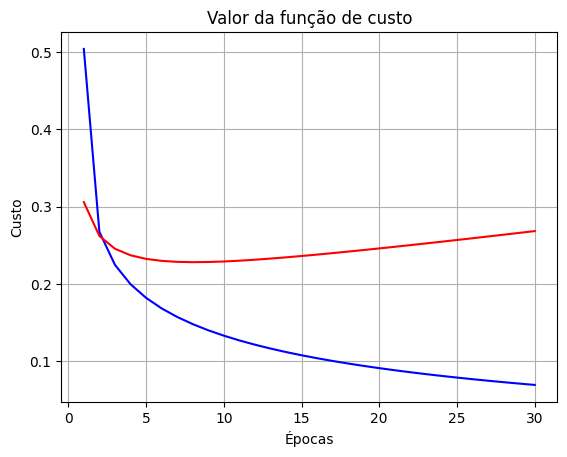

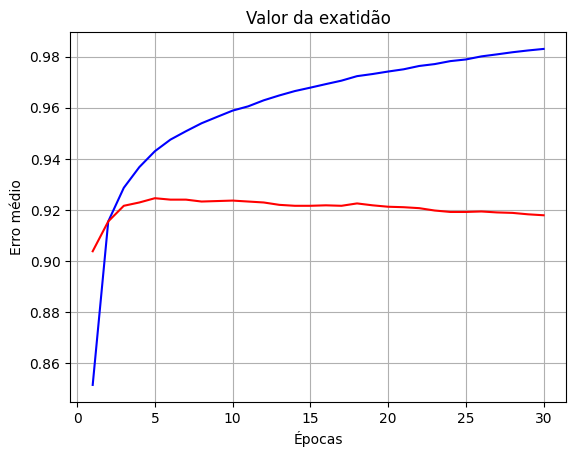

In [16]:
# Definir vetores com valores da função de custo e da métrica para os dados de treinamento e de validação
# Inclua seu código aqui (~5 linhas)
history_dict = history.history
custo = history_dict['loss']
exatidao = history_dict['accuracy']
custo_val = history_dict['val_loss']
exatidao_val = history_dict['val_accuracy']

# Criar vetor de épocas
# Inclua seu código aqui (~1 linha)
epocas = range(1, len(custo) + 1)

# Fazer o gráfico dos valores da função de custo
# Inclua seu código aqui (~6 linhas)
plt.plot(epocas, custo, 'b')
plt.plot(epocas, custo_val, 'r')
plt.title('Valor da função de custo')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.grid()
plt.show()


# Fazer o gráfico dos valores da métrica
# Inclua seu código aqui (~6 linhas)
plt.plot(epocas, exatidao, 'b')
plt.plot(epocas, exatidao_val, 'r')
plt.title('Valor da exatidão')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.grid()
plt.show()


## 6.4 Teste da RNA

Após o treinamento é necessário verificar o desempenho da RNA. paar isso vamos calcular os valores da função de custo e da métrica para as imagens do conjunto de validação e depois vamos usar o método `predict` para prever as classes de algumas imagens.

O código da célula abaixo calcula o resultado da função de custo e da exatidão para os exemplos validação usando o método `evaluate`.

### Exercício #9: Avaliação do desempenho da RNA

Na célula abaixo determine o desemepnho da RNA usando o método `evaluate` para calcular o valor da função d ecusto e da métrica para os dados de validação.

In [17]:
# Avalia desempenho da RNA para os dados de validação
# Inclua seu código aqui (~1 linha)
eval_results = rna.evaluate(val_batches, verbose=0)

# Apresenta os resultados
# Inclua seu código aqui (~2 linhas)
for metric, value in zip(rna.metrics_names, eval_results):
    print(metric + ': {:.4}'.format(value))

loss: 0.2683
accuracy: 0.918


**Saída esperada:**

    loss: 0.2684
    accuracy: 0.9181

### Exercício #10: Teste de classificação de imagens

Para poder fornecer as imagens para a RNA usando o método `predict` você precisa extrai-las do objeto `val_data` e processá-las com a função `format_image`, que por sua vez é chamada pelo método `map()`. Além disso, você tem que incluir o eixo dos exemplos na imagem de acordo com o esperado por uma RNA do Keras.

Na célula baixo crie um código que calcula as classes previstas para os 5 primeiros exemplos do conjunto de validação usando o método `predict` e apresenta os resultados junto com as imagens e as classes previstas e reais.

1/1 [==============================] - 0s 380ms/step
Classe prevista = Pasture , Classe real = Pasture


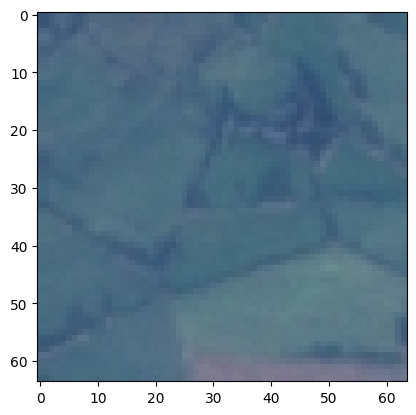

1/1 [==============================] - 0s 18ms/step
Classe prevista = Residential , Classe real = Residential


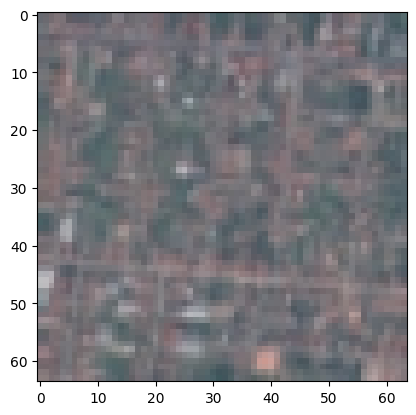

1/1 [==============================] - 0s 17ms/step
Classe prevista = AnnualCrop , Classe real = AnnualCrop


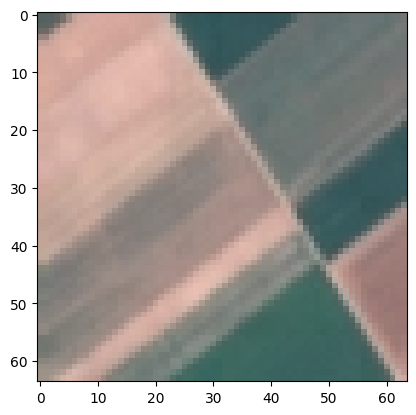

1/1 [==============================] - 0s 18ms/step
Classe prevista = Forest , Classe real = Forest


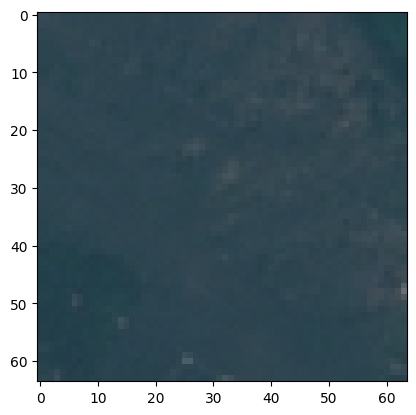

1/1 [==============================] - 0s 21ms/step
Classe prevista = AnnualCrop , Classe real = AnnualCrop


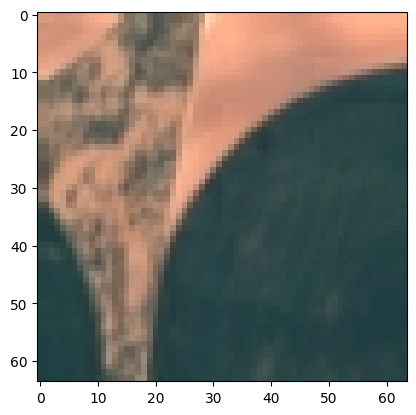

In [18]:
# Itera no objeto val_data para pegar 5 imagens e aplica função format_image
# Inclua seu código aqui (~1 linha)
for data in val_data.map(format_image).take(5):

    # Extrai imagem e classe prevista
    # Inclua seu código aqui (~1 linha)
    image, label = data

    # Adiciona eixo dos exemplos
    # Inclua seu código aqui (~1 linha)
    image = np.expand_dims(image, axis=0)

    # Calcula probabilidades previstas pela RNA
    # Inclua seu código aqui (~1 linha)
    yprev = rna.predict(image)

    # Determina classe prevista
    # Inclua seu código aqui (~1 linha)
    label_prev = np.argmax(yprev)

    # Apresenta resultados das classes e mostra imagem
    # Inclua seu código aqui (~4 linhas)
    print('Classe prevista =', labels_list[label_prev], ', Classe real =', labels_list[label])
    plt.imshow(image[0])
    plt.show()

**Saída esperada (sem incluir as imagens):**

    Classe prevista = Industrial , Classe real = Industrial
    Classe prevista = AnnualCrop , Classe real = AnnualCrop
    Classe prevista = HerbaceousVegetation , Classe real = HerbaceousVegetation
    Classe prevista = River , Classe real = River
    Classe prevista = Residential , Classe real = Residential